Installations


In [ ]:
 ! pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd


import re
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

In [ ]:
# bert + dimensionality



from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('sentence-transformers/stsb-distilbert-base', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Downloading:   0%|          | 0.00/539 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/253M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_text(df):
    #set up punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [ ]:
Train_data = pd.read_csv('/content/sample_data/drugsComTrain_trimmed.csv',encoding='utf8', engine='python',error_bad_lines=False)
print (Train_data.shape)
print (Train_data.columns)
Test_data = pd.read_csv('/content/sample_data/drugsComTest_trimmed.csv',encoding='utf8', engine='python',error_bad_lines=False)
print(Test_data.shape)


(5187, 7)
Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
(1785, 7)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Train_data['Review-cleaned'] = clean_text(Train_data['review'].apply(str))
Test_data['Review-cleaned'] = clean_text(Test_data['review'].apply(str))

In [ ]:
Train_data.head()
# print(Train_data.shape)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review-cleaned
0,225508,Bupropion,Smoking Cessation,"""Love this, no mouth sores, or ulcers like Wel...",10,41873,15,love this no mouth sores or ulcers like wellbu...
1,225257,Bupropion,Depression,"""I was really glad that I experienced none of ...",4,42285,0,i was really glad that i experienced none of t...
2,224842,Bupropion,Depression,"""F/26, Wellbutrin SR 100mg twice a day &amp; I...",10,42737,14,f 26 wellbutrin sr mg twice a day &amp i feel ...
3,225955,Bupropion,Depression,"""Wellbutrin has significantly improved my over...",8,39972,46,wellbutrin has significantly improved my overa...
4,225545,Bupropion,Depression,"""I have taken Prozac, Zoloft, Paxil, and then ...",10,41601,41,i have taken prozac zoloft paxil and then my d...


In [ ]:
Train_labels = Train_data[['drugName']]

In [ ]:
Test_labels = Test_data[['drugName']]

In [ ]:
Test_labels.shape

(1785, 1)

In [ ]:
# list of labels
labels_list = list(Train_labels['drugName'].unique())
print("count of classes:",len(labels_list),"\n")
print("Labels's list : \n",labels_list,"\n")
print("value count for a class :\n",Train_data['drugName'].value_counts())

count of classes: 5 

Labels's list : 
 ['Bupropion', 'Gabapentin', 'Implanon', 'Miconazole', 'Venlafaxine'] 

value count for a class :
 Implanon       1102
Gabapentin     1047
Bupropion      1022
Venlafaxine    1016
Miconazole     1000
Name: drugName, dtype: int64


Bert Embeddings

In [ ]:
Train_corpus = list(Train_data['Review-cleaned'])
Test_corpus = list(Test_data['Review-cleaned'])

In [ ]:
len(Train_corpus)

5187

In [ ]:
len(Test_corpus)

1785

In [ ]:
X_Train_embeddings = embedder.encode(Train_corpus)

In [ ]:
X_Test_embeddings = embedder.encode(Test_corpus)

In [ ]:
X_Train_embeddings

array([[-0.00947596, -0.130802  ,  0.51888835, ..., -0.11282377,
         0.3043258 , -0.4393061 ],
       [-0.4946848 , -0.5778166 ,  0.69368786, ...,  0.25801337,
         0.12260108,  0.04919191],
       [-0.15910126, -0.48441   ,  0.9355656 , ...,  0.07405598,
        -0.22521514, -0.43981707],
       ...,
       [-0.01689233, -0.48630035,  0.83939755, ..., -0.0315172 ,
        -0.28879005,  0.19147354],
       [-0.2220603 , -0.456098  ,  1.0534074 , ..., -0.06708415,
        -0.07204203,  0.05422823],
       [ 0.03953104, -0.87830174,  0.8149783 , ..., -0.13032335,
        -0.39824718,  0.05956945]], dtype=float32)

In [ ]:
X_Test_embeddings.shape

(1785, 768)

Plot Varience graph

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA



df_pca = pd.DataFrame(X_Train_embeddings)

pca = PCA()
pca.fit(df_pca)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


PCA Implementation

In [ ]:
 
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_Test_embeddings)
pca = PCA(n_components = 155)
pca.fit(data_rescaled)
PCA_Vector = pca.transform(data_rescaled)

In [ ]:
X_Train = PCA_Vector

In [ ]:
X_Test = PCA_Vector

In [ ]:
X_Test.shape

(1785, 155)

SVM Model

In [ ]:
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

Model Tuning

1.Multiple Randomn search for svm.
2.Try class weights [higher weight for miss classified classes].

3.Learn the reviews.[abeguity][p1].
4.Data preprocessing[p2].
5.Diff bert embeddings[p3].

In [ ]:
support.fit(X_Train, Train_labels)

LinearSVC(random_state=20)

In [ ]:
y_pred = support.predict(X_Test)

In [ ]:
print(Test_labels.shape)
print(y_pred.shape)

(1785, 1)
(1785,)


Reports

1.Train and Test Accuracy

In [ ]:
print("Trainig Accuracy : ",accuracy_score(Train_labels, support.predict(X_Train)))
print("Test Accuracy : ",accuracy_score(Test_labels, y_pred))

Trainig Accuracy :  0.8380566801619433
Test Accuracy :  0.4280112044817927


Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection  import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# print(f1_score(Test_labels, y_pred, average="macro"))
# print(precision_score(Test_labels, y_pred, average="macro"))
# print(recall_score(Test_labels, y_pred, average="macro"))  

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Test_labels, y_pred, target_names=['Bupropion', 'Gabapentin', 'Implanon', 'Miconazole', 'Venlafaxine']))


Classification Report

              precision    recall  f1-score   support

   Bupropion       0.25      0.22      0.24       347
  Gabapentin       0.36      0.36      0.36       368
    Implanon       0.60      0.66      0.63       404
  Miconazole       0.56      0.66      0.60       344
 Venlafaxine       0.23      0.19      0.21       322

    accuracy                           0.43      1785
   macro avg       0.40      0.42      0.41      1785
weighted avg       0.41      0.43      0.42      1785



In [ ]:
cm = confusion_matrix(Test_labels, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['Bupropion', 'Gabapentin', 'Implanon', 'Miconazole', 'Venlafaxine'], 
                     columns = ['Bupropion', 'Gabapentin', 'Implanon', 'Miconazole', 'Venlafaxine'])

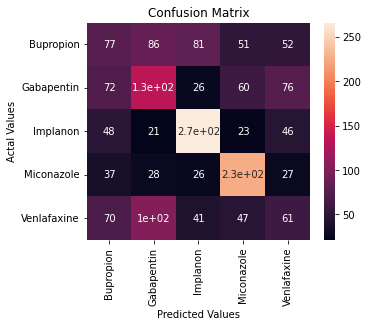

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()